### Analysis of algorithm performance across datasets and metrics for NeurIPS submission

For these tables we use the meta-dataset as for the RecZilla pipeline.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

In [2]:
cd ../RecSys2019_DeepLearning_Evaluation

C:\Users\jvliz\Documents\UMD\reczilla\RecSys2019_DeepLearning_Evaluation


In [3]:
from ReczillaClassifier.get_alg_feat_selection_data import get_metafeats

In [4]:
metafeats = get_metafeats("metadata-v1.1")

In [5]:
cuts = [1, 2, 5, 10, 50]
metrics = ["NDCG", "PRECISION", "COVERAGE_ITEM", "COVERAGE_ITEM_HIT", "COVERAGE_USER_HIT"] # "F1", "RECALL"]

In [6]:
metric = "PRECISION"
cut = 10

In [7]:
best_perf_df = metafeats.groupby(["alg_family", "original_split_path"])[f"test_metric_{metric}_cut_{str(cut)}"].max().unstack(level="alg_family")
best_perf_df

alg_family,CoClustering,EASE_R_Recommender,GlobalEffects,IALSRecommender,ItemKNNCF,MatrixFactorization_AsySVD_Cython,MatrixFactorization_BPR_Cython,MatrixFactorization_FunkSVD_Cython,NMFRecommender,P3alphaRecommender,PureSVDRecommender,RP3betaRecommender,Random,SLIMElasticNetRecommender,SLIM_BPR_Cython,SlopeOne,TopPop,UserKNNCF
original_split_path,,,,,,,,,,,,,,,,,,
gs://reczilla-results/dataset-splits/splits-v5/AmazonAllBeauty/DataSplitter_leave_k_out_last,0.004317,0.000000,0.000000,0.002158,0.000000,0.002158,0.002158,0.002158,0.001439,0.000000,0.002158,0.000000,0.000000,0.000000,0.000000,0.0,0.001439,0.000719
gs://reczilla-results/dataset-splits/splits-v5/AmazonAllElectronics/DataSplitter_leave_k_out_last,0.003226,0.000000,0.001613,0.003226,0.003226,0.004032,0.002419,0.003226,0.001613,0.000000,0.004839,0.000000,0.000000,0.000000,0.000000,0.0,0.001613,0.002419
gs://reczilla-results/dataset-splits/splits-v5/AmazonAlternativeRock/DataSplitter_leave_k_out_last,0.001667,0.000833,0.000833,0.002500,0.002500,0.002500,0.002500,0.003333,0.001667,0.000833,0.001667,0.001667,0.000000,0.000833,0.002500,0.0,0.000833,0.001667
gs://reczilla-results/dataset-splits/splits-v5/AmazonAmazonFashion/DataSplitter_leave_k_out_last,0.001186,NaN,0.000791,0.001976,0.000791,0.001976,0.001186,0.001976,0.000791,0.000395,0.001581,0.000395,0.000000,0.000000,0.000395,NaN,0.001581,0.001976
gs://reczilla-results/dataset-splits/splits-v5/AmazonAmazonInstantVideo/DataSplitter_leave_k_out_last,0.000044,0.000024,0.001529,0.013164,0.017136,0.010042,0.007595,0.009877,0.011786,0.017284,0.013718,0.016545,0.000050,0.016679,0.016434,NaN,0.007975,0.015654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gs://reczilla-results/dataset-splits/splits-v5/NetflixPrize/DataSplitter_leave_k_out_last,NaN,NaN,0.000704,NaN,0.009968,NaN,0.003385,NaN,0.006666,0.006716,0.007160,0.008454,0.000055,0.010418,0.010260,NaN,0.002883,0.001095
gs://reczilla-results/dataset-splits/splits-v5/Recipes/DataSplitter_leave_k_out_last,0.000003,NaN,0.000127,0.001509,0.001483,0.000070,0.000462,0.000634,0.001751,0.001399,0.001771,0.000561,0.000000,NaN,0.000787,NaN,0.001630,0.001241
gs://reczilla-results/dataset-splits/splits-v5/Wikilens/DataSplitter_leave_k_out_last,0.000364,0.011636,0.009455,0.009091,0.012727,0.008364,0.005091,0.008364,0.011636,0.011273,0.010545,0.010545,0.000364,0.012364,0.009455,0.0,0.008364,0.014182


In [8]:
all_metafeats = [col for col in metafeats if col.startswith("f_")]

In [9]:
metafeat_lookup = metafeats[["original_split_path"] + all_metafeats].set_index("original_split_path").drop_duplicates()
metafeat_lookup=(metafeat_lookup-metafeat_lookup.mean())/metafeat_lookup.std() # Normalize
nan_feats = metafeat_lookup.isna().sum(axis=0) > 0
nan_feats = nan_feats.loc[nan_feats].index # Drop NaNs
metafeat_lookup = metafeat_lookup[[col for col in metafeat_lookup.columns if not col in nan_feats]]
metafeat_lookup

,f_dist_feature__kind_item__pre_agg_func_count__agg_func_Gini,f_dist_feature__kind_item__pre_agg_func_count__agg_func_entropy,f_dist_feature__kind_item__pre_agg_func_count__agg_func_kurtosis,f_dist_feature__kind_item__pre_agg_func_count__agg_func_max,f_dist_feature__kind_item__pre_agg_func_count__agg_func_mean,f_dist_feature__kind_item__pre_agg_func_count__agg_func_median,f_dist_feature__kind_item__pre_agg_func_count__agg_func_min,f_dist_feature__kind_item__pre_agg_func_count__agg_func_mode,f_dist_feature__kind_item__pre_agg_func_count__agg_func_skewness,f_dist_feature__kind_item__pre_agg_func_count__agg_func_std,...,f_landmarker__alg_user_knn_k5__cut_5__NDCG,f_landmarker__alg_user_knn_k5__cut_5__NOVELTY,f_landmarker__alg_user_knn_k5__cut_5__PRECISION,f_landmarker__alg_user_knn_k5__cut_5__PRECISION_RECALL_MIN_DEN,f_landmarker__alg_user_knn_k5__cut_5__RECALL,f_landmarker__alg_user_knn_k5__cut_5__SHANNON_ENTROPY,f_num_interactions,f_num_items,f_num_users,f_sparsity
original_split_path,,,,,,,,,,,,,,,,,,,,,
gs://reczilla-results/dataset-splits/splits-v5/AmazonElectronics/DataSplitter_leave_k_out_last,0.120890,0.229316,2.200703,-0.120006,-0.173560,-0.118569,-0.110583,-0.165245,2.524078,-0.214686,...,-0.472265,-0.384884,-0.421260,-0.421260,-0.421260,-0.661861,-0.053439,1.719486,2.695692,0.252090
gs://reczilla-results/dataset-splits/splits-v5/Jester2/DataSplitter_leave_k_out_last,-4.197755,1.962841,-0.459007,0.532371,8.159573,9.093511,9.109350,7.319709,-0.920903,4.062220,...,0.184999,0.310417,0.132328,0.132328,0.132328,1.480314,-0.101356,-0.500644,-0.135581,-8.359496
gs://reczilla-results/dataset-splits/splits-v5/YahooMovies/DataSplitter_leave_k_out_last,0.098510,0.645371,-0.155373,-0.130659,-0.165305,-0.117584,-0.110583,-0.119042,0.349176,-0.187521,...,-0.166139,-0.277324,-0.175221,-0.175221,-0.175221,1.573710,-0.205899,-0.445703,-0.367139,0.163322
gs://reczilla-results/dataset-splits/splits-v5/AmazonIndustrialScientific/DataSplitter_leave_k_out_last,0.387874,-0.563926,0.086927,-0.182448,-0.176739,-0.119555,-0.110583,-0.165245,0.547232,-0.227381,...,-0.414086,-0.524724,-0.359750,-0.359750,-0.359750,-0.315922,-0.218863,-0.289563,-0.366488,0.250430
gs://reczilla-results/dataset-splits/splits-v5/AmazonKindleStore/DataSplitter_leave_k_out_last,-0.662902,0.233522,1.618264,-0.156497,-0.174709,-0.118569,-0.110583,-0.165245,1.074130,-0.223735,...,-0.305796,-0.672740,-0.298241,-0.298241,-0.298241,-0.778426,-0.119667,1.507337,0.610389,0.251772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gs://reczilla-results/dataset-splits/splits-v5/AmazonMoviesTV/DataSplitter_leave_k_out_last,-0.098277,0.584904,-0.192092,-0.150250,-0.170295,-0.118569,-0.110583,-0.119042,0.056846,-0.211721,...,-0.459099,-0.414592,-0.421260,-0.421260,-0.421260,-0.918858,-0.082991,0.436191,1.115507,0.251176
gs://reczilla-results/dataset-splits/splits-v5/AmazonKitchenDining/DataSplitter_leave_k_out_last,1.272986,-0.920493,-0.369637,-0.184034,-0.176986,-0.119555,-0.110583,-0.165245,-0.309348,-0.228009,...,2.281919,0.710447,1.567557,1.567557,1.567557,-0.505400,-0.220072,-0.484231,-0.403182,0.237848
gs://reczilla-results/dataset-splits/splits-v5/AmazonAppliances/DataSplitter_leave_k_out_last,0.825428,-0.709833,-0.149699,-0.183510,-0.176861,-0.119555,-0.110583,-0.165245,0.258466,-0.227642,...,-0.195918,-0.413232,-0.236731,-0.236731,-0.236731,-0.381282,-0.219914,-0.448101,-0.395963,0.247226


In [31]:
linear_coeffs = []
for alg_fam_name in best_perf_df.columns:
    target = best_perf_df[alg_fam_name].dropna()
    features = metafeat_lookup.loc[target.index]
    model = Ridge(alpha=0.5)
    model.fit(features, target)
    coeffs = {feat: val for feat, val in zip(features.columns, model.coef_)}
    coeffs["alg_family"] = alg_fam_name
    linear_coeffs.append(coeffs)
linear_coeffs = pd.DataFrame(linear_coeffs).set_index("alg_family")
linear_coeffs = linear_coeffs.abs()

In [11]:
import statsmodels
import statsmodels.api as sm

In [28]:
#model = sm.OLS(target, features)

In [29]:
#results_fu = model.fit_regularized(L1_wt=1, alpha=0.5)

In [30]:
#results_fu.summary()

NotImplementedError: 

In [23]:
dir(results_fu)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_data_attr',
 '_data_in_cache',
 'converged',
 'fittedvalues',
 'initialize',
 'k_constant',
 'model',
 'params',
 'predict',
 'summary']

In [32]:
linear_coeffs.abs().agg(['idxmax','max'],axis=1)

,idxmax,max
CoClustering,f_landmarker__alg_pure_svd_fact5__cut_1__DIVER...,0.001073
EASE_R_Recommender,f_dist_feature__kind_user__pre_agg_func_count_...,0.003648
GlobalEffects,f_dist_feature__kind_rating__pre_agg_func_None...,0.001506
IALSRecommender,f_dist_feature__kind_user__pre_agg_func_count_...,0.002827
ItemKNNCF,f_dist_feature__kind_user__pre_agg_func_count_...,0.00569
MatrixFactorization_AsySVD_Cython,f_dist_feature__kind_user__pre_agg_func_count_...,0.002324
MatrixFactorization_BPR_Cython,f_dist_feature__kind_user__pre_agg_func_count_...,0.003433
MatrixFactorization_FunkSVD_Cython,f_dist_feature__kind_user__pre_agg_func_count_...,0.00309
NMFRecommender,f_dist_feature__kind_user__pre_agg_func_count_...,0.002715
P3alphaRecommender,f_dist_feature__kind_user__pre_agg_func_count_...,0.003889


In [61]:
# Fraction of times that feature appears in top 10 features
frac_top_metafeats = (linear_coeffs.rank(axis=1) <= 10).mean(axis=0)
frac_top_metafeats = frac_top_metafeats.loc[frac_top_metafeats > 0]

<AxesSubplot:>

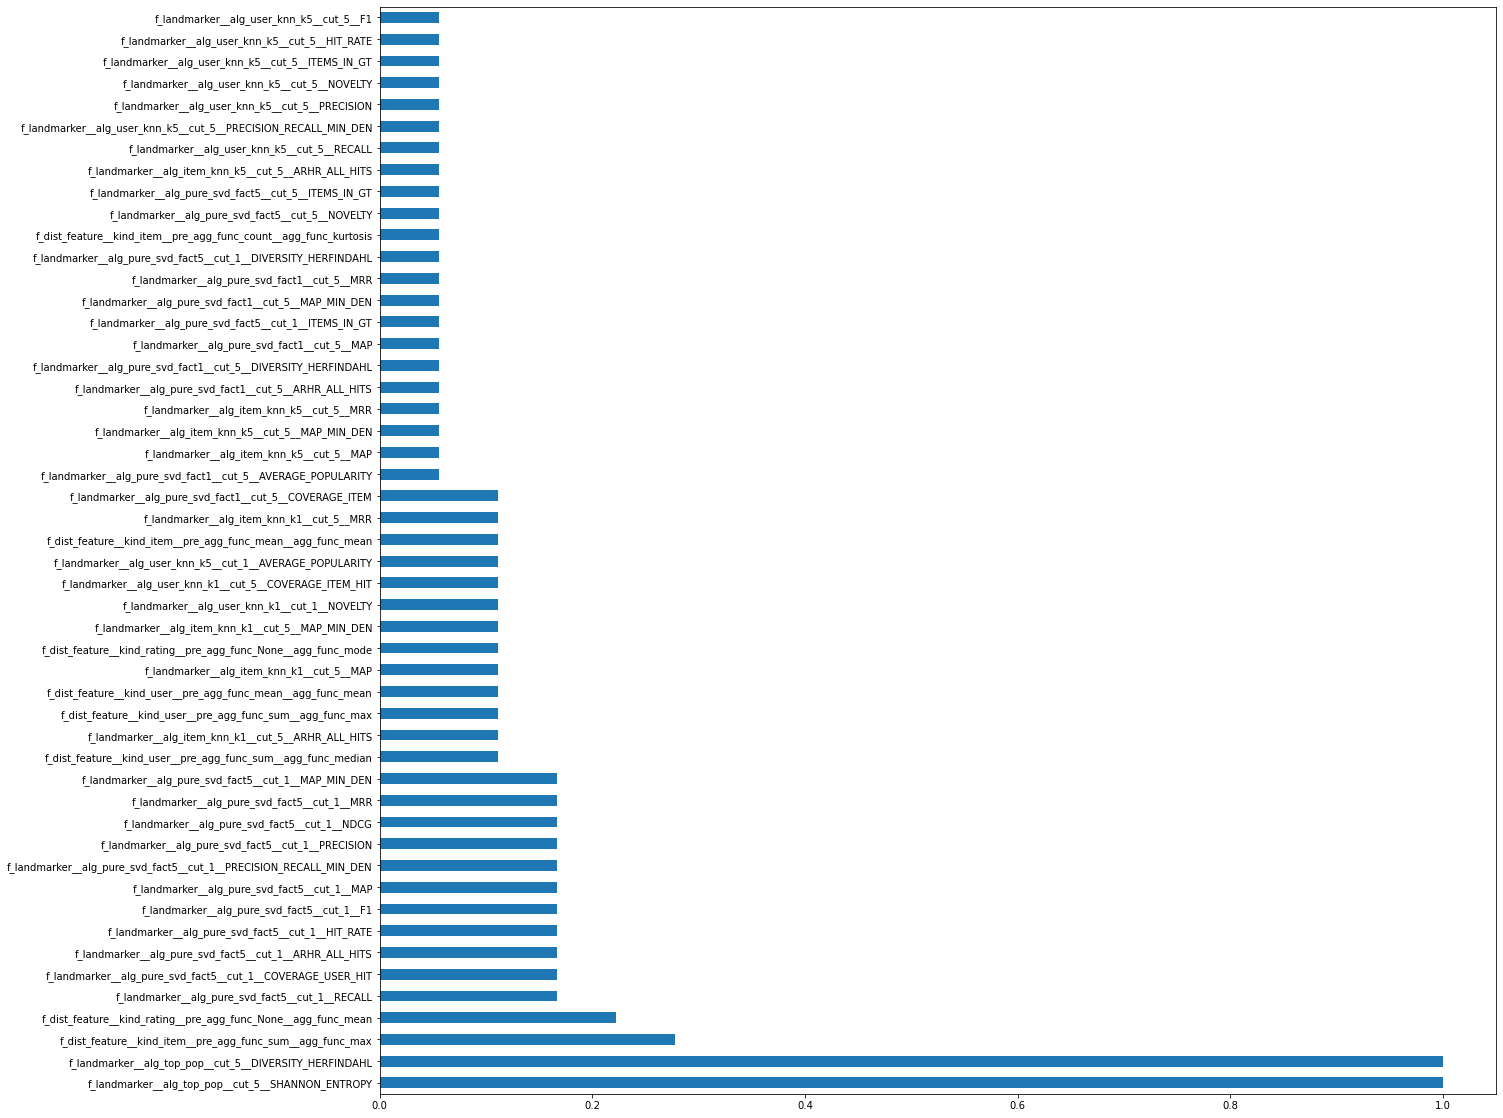

In [64]:
frac_top_metafeats.sort_values(ascending=False).iloc[:50].plot.barh(figsize=(20, 20))

[Text(0, 0, 'f_dist_feature__kind_item__pre_agg_func_count__agg_func_Gini'),
 Text(0, 1, 'f_dist_feature__kind_item__pre_agg_func_count__agg_func_entropy'),
 Text(0, 2, 'f_dist_feature__kind_item__pre_agg_func_count__agg_func_kurtosis'),
 Text(0, 3, 'f_dist_feature__kind_item__pre_agg_func_count__agg_func_max'),
 Text(0, 4, 'f_dist_feature__kind_item__pre_agg_func_count__agg_func_mean'),
 Text(0, 5, 'f_dist_feature__kind_item__pre_agg_func_count__agg_func_median'),
 Text(0, 6, 'f_dist_feature__kind_item__pre_agg_func_count__agg_func_min'),
 Text(0, 7, 'f_dist_feature__kind_item__pre_agg_func_count__agg_func_mode'),
 Text(0, 8, 'f_dist_feature__kind_item__pre_agg_func_count__agg_func_skewness'),
 Text(0, 9, 'f_dist_feature__kind_item__pre_agg_func_count__agg_func_std'),
 Text(0, 10, 'f_dist_feature__kind_item__pre_agg_func_mean__agg_func_Gini'),
 Text(0, 11, 'f_dist_feature__kind_item__pre_agg_func_mean__agg_func_entropy'),
 Text(0, 12, 'f_dist_feature__kind_item__pre_agg_func_mean__agg

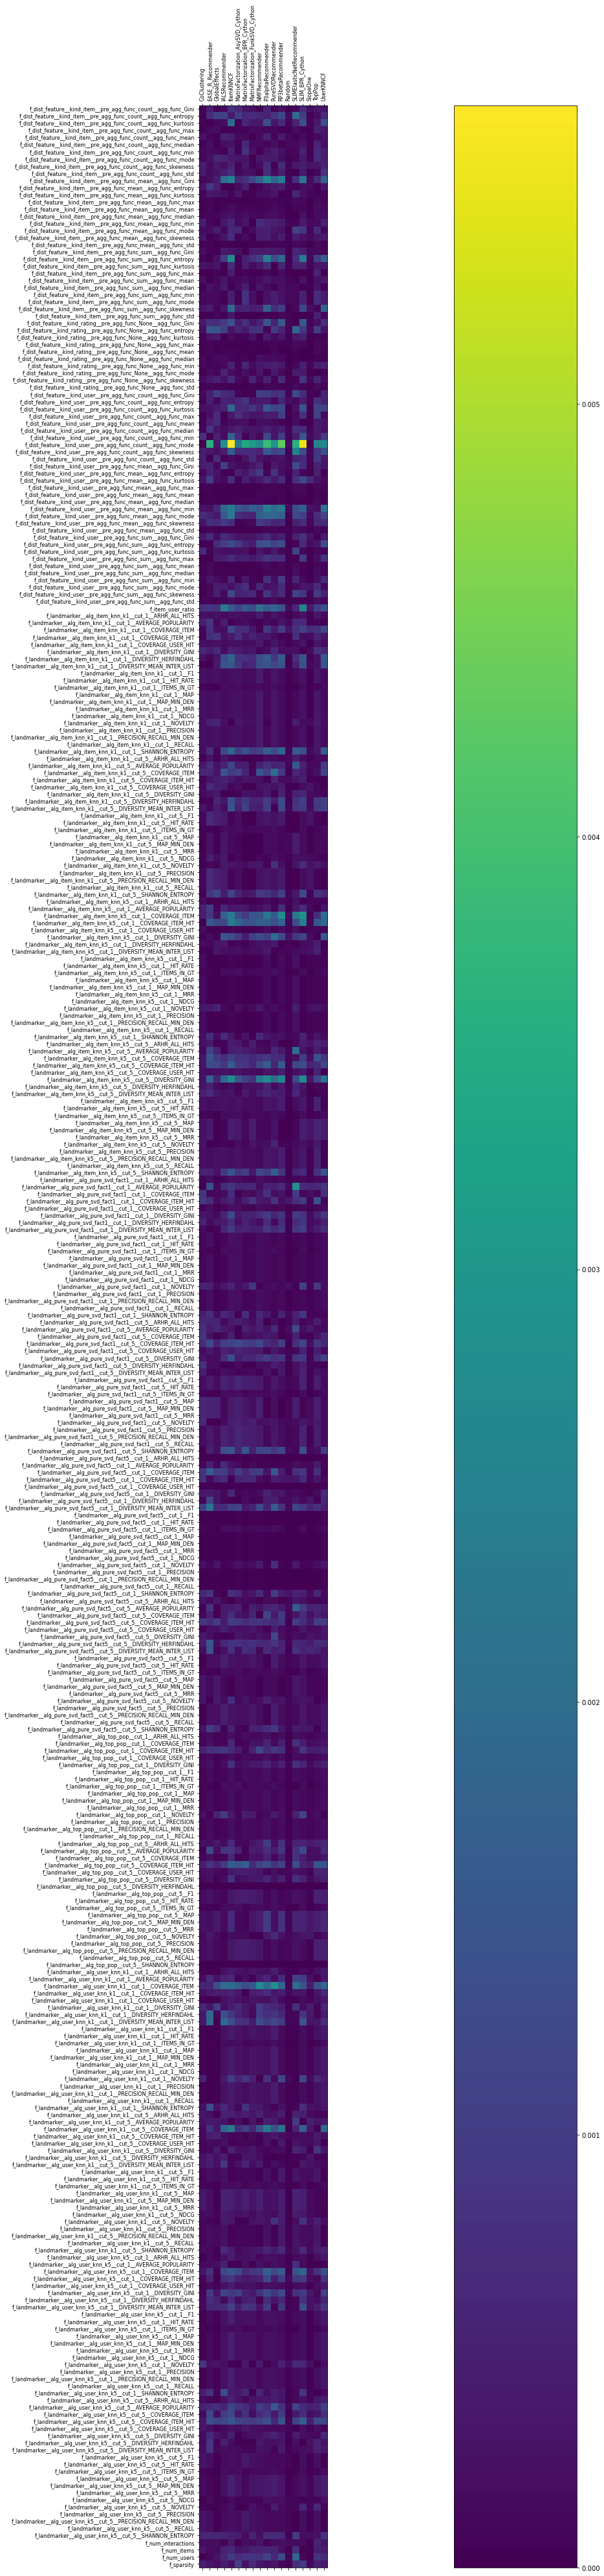

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(70, 70))
m = ax.matshow(linear_coeffs.T)
fig.colorbar(m)
xaxis = np.arange(len(linear_coeffs.index))
yaxis = np.arange(len(linear_coeffs.columns))
ax.set_xticks(xaxis)
ax.set_yticks(yaxis)
ax.set_xticklabels(linear_coeffs.index, fontsize=8, rotation=90)
ax.set_yticklabels(linear_coeffs.columns, fontsize=8)

f_dist_feature__kind_user__pre_agg_func_count__agg_func_mode          0.002759
f_landmarker__alg_item_knn_k5__cut_5__DIVERSITY_GINI                  0.001553
f_landmarker__alg_user_knn_k1__cut_1__COVERAGE_ITEM                   0.001553
f_landmarker__alg_item_knn_k5__cut_1__COVERAGE_ITEM                   0.001435
f_landmarker__alg_item_knn_k5__cut_1__COVERAGE_ITEM_HIT               0.001411
f_dist_feature__kind_user__pre_agg_func_mean__agg_func_min            0.001340
f_item_user_ratio                                                     0.001315
f_dist_feature__kind_item__pre_agg_func_mean__agg_func_Gini           0.001238
f_landmarker__alg_user_knn_k1__cut_5__COVERAGE_ITEM                   0.001100
f_landmarker__alg_user_knn_k5__cut_5__COVERAGE_ITEM_HIT               0.001069
f_dist_feature__kind_user__pre_agg_func_mean__agg_func_mode           0.001058
f_landmarker__alg_item_knn_k1__cut_1__SHANNON_ENTROPY                 0.001046
f_landmarker__alg_user_knn_k5__cut_1__COVERAGE_ITEM 

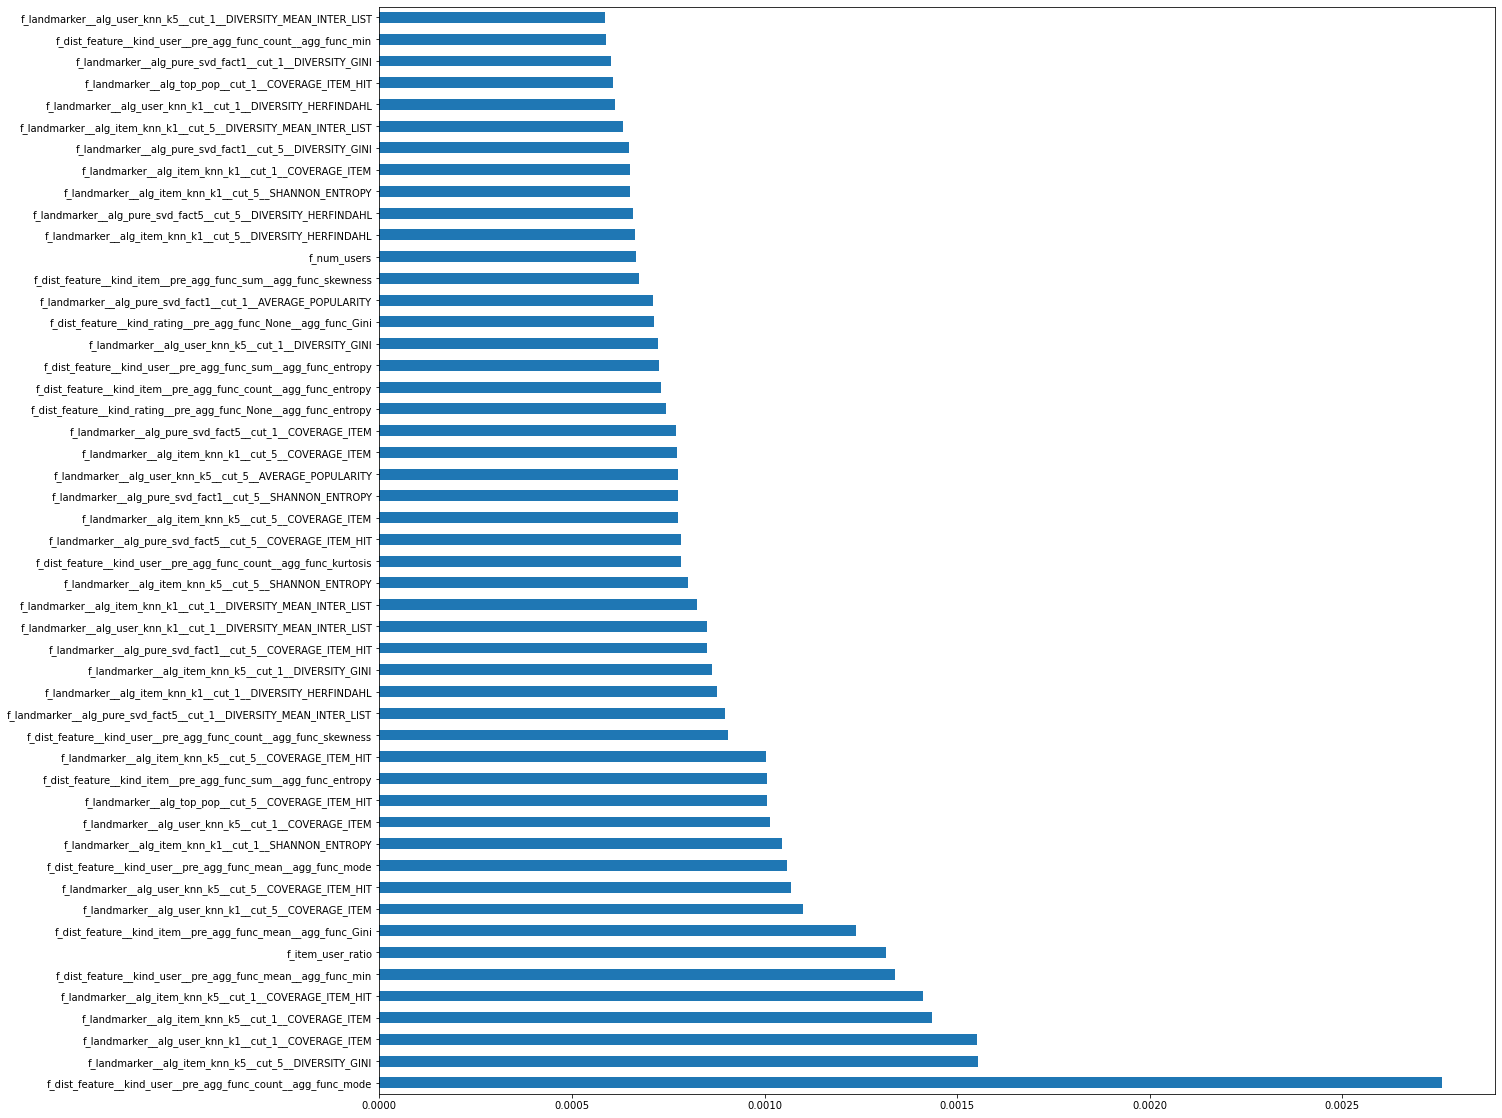

In [46]:
top_mean_coeffs = linear_coeffs.mean().sort_values(ascending=False)
top_mean_coeffs.iloc[:50].plot.barh(figsize=(20, 20))
top_mean_coeffs[:20]

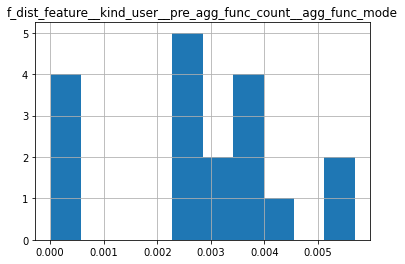

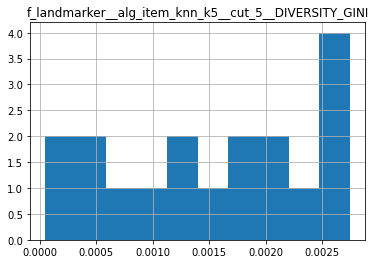

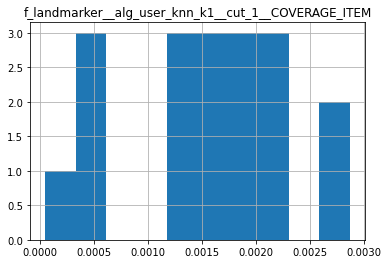

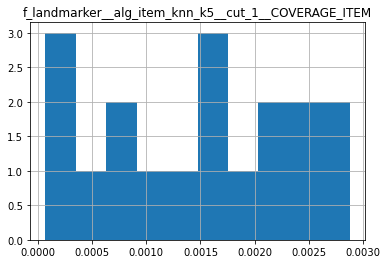

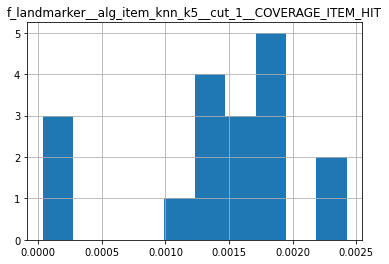

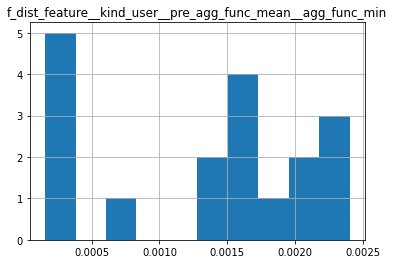

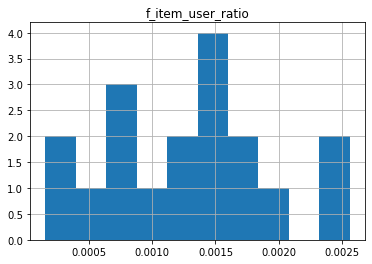

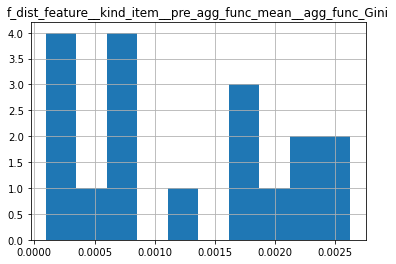

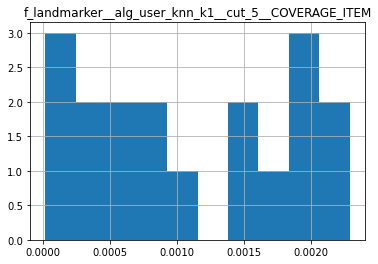

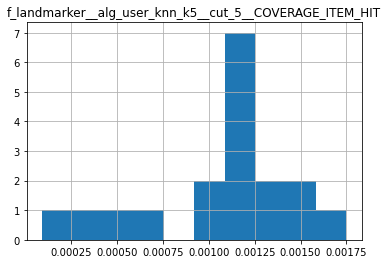

In [56]:
for mf in top_mean_coeffs.index[:10]:
    dist = linear_coeffs[mf]
    plt.figure()
    dist.hist()
    plt.title(mf)

In [48]:
mf

'f_dist_feature__kind_user__pre_agg_func_count__agg_func_mode'